## Libraries and seed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import Ridge

from catboost import CatBoostRegressor, Pool

In [3]:
RANDOM_SEED = 322
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

## Description

In [5]:
train = pd.read_csv('train.csv')
train.head()

,dt,price_p05,price_p95,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id
0,2024-03-28,1.136102,1.167625,-0.588881,-0.298690,-1.936029,0.621756,-0.439349,0,0,6,8,2,76,3,28,13,3,0
1,2024-03-29,1.133129,1.133590,-0.646402,0.074779,-2.090906,0.756995,-0.759561,0,0,6,8,33,77,4,29,13,3,0
2,2024-03-30,1.134522,1.165849,-0.636272,-0.644614,-1.825121,0.577839,0.122226,1,0,6,8,72,76,5,30,13,3,0
3,2024-03-31,1.152592,1.153091,-0.579004,-0.614834,-1.817634,0.589653,-0.520220,1,0,6,8,21,77,6,31,13,3,0
4,2024-04-01,1.166641,1.167096,-0.623265,-0.116090,-1.892973,0.689895,-1.036820,0,0,6,8,50,76,0,1,14,4,0


In [6]:
def descriptive_statistics(df):
    display(df.shape)
    display(df.info())
    display(df.describe())
    print('ДУБЛИКАТЫ:','\n')
    print(df[df.duplicated()].sum())
    print('\n')
    print('NaNs:', '\n')
    print(df.isna().sum())

In [7]:
descriptive_statistics(train)

(29100, 19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29100 entries, 0 to 29099
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   29100 non-null  object 
 1   price_p05            29100 non-null  float64
 2   price_p95            29100 non-null  float64
 3   n_stores             29100 non-null  float64
 4   precpt               29100 non-null  float64
 5   avg_temperature      29100 non-null  float64
 6   avg_humidity         29100 non-null  float64
 7   avg_wind_level       29100 non-null  float64
 8   holiday_flag         29100 non-null  int64  
 9   activity_flag        29100 non-null  int64  
 10  management_group_id  29100 non-null  int64  
 11  first_category_id    29100 non-null  int64  
 12  second_category_id   29100 non-null  int64  
 13  third_category_id    29100 non-null  int64  
 14  dow                  29100 non-null  int64  
 15  day_of_month         29100 non-null 

None

,price_p05,price_p95,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id
count,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000,29100.000000
mean,1.021477,1.116897,-0.002295,-0.186648,-0.474845,-0.050176,0.060413,0.366667,0.548866,3.756873,14.718660,36.543058,85.894983,3.100000,15.566667,17.200000,4.366667,310.117526
std,0.246938,0.238082,0.989934,0.961778,0.847154,1.018483,1.103594,0.481903,0.497615,2.331366,8.717525,21.698045,57.455431,1.989171,8.758702,2.481977,0.604622,184.343598
min,0.000000,0.000109,-0.749200,-1.139015,-2.566182,-3.333128,-2.467447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,3.000000,0.000000
25%,0.913598,1.088465,-0.582488,-0.680611,-1.168266,-0.170897,-0.756115,0.000000,0.000000,1.000000,8.000000,18.000000,33.000000,1.000000,8.000000,15.000000,4.000000,146.000000
50%,1.038869,1.142148,-0.441623,-0.480054,-0.498593,0.313721,-0.032140,0.000000,1.000000,5.000000,17.000000,36.000000,78.000000,3.000000,15.500000,17.000000,4.000000,310.000000
75%,1.143169,1.173151,0.133566,-0.167565,0.197678,0.532944,0.747768,1.000000,1.000000,6.000000,23.000000,55.000000,129.000000,5.000000,23.000000,19.000000,5.000000,469.000000
max,3.512162,3.546587,5.975207,6.458323,1.233543,1.276349,5.164815,1.000000,1.000000,6.000000,28.000000,75.000000,196.000000,6.000000,31.000000,21.000000,5.000000,634.000000


ДУБЛИКАТЫ: 

dt                       0
price_p05              0.0
price_p95              0.0
n_stores               0.0
precpt                 0.0
avg_temperature        0.0
avg_humidity           0.0
avg_wind_level         0.0
holiday_flag             0
activity_flag            0
management_group_id      0
first_category_id        0
second_category_id       0
third_category_id        0
dow                      0
day_of_month             0
week_of_year             0
month                    0
product_id               0
dtype: object


NaNs: 

dt                     0
price_p05              0
price_p95              0
n_stores               0
precpt                 0
avg_temperature        0
avg_humidity           0
avg_wind_level         0
holiday_flag           0
activity_flag          0
management_group_id    0
first_category_id      0
second_category_id     0
third_category_id      0
dow                    0
day_of_month           0
week_of_year           0
month                  0


In [8]:
test = pd.read_csv('test.csv')
test.head()

,dt,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id,row_id
0,2024-05-27,-0.336440,0.966715,0.619788,0.455497,0.011164,0,0,0,9,72,68,0,27,22,5,113,0
1,2024-05-28,-0.341302,0.970148,0.685420,0.231812,0.044739,0,1,0,9,51,68,1,28,22,5,113,1
2,2024-05-29,-0.467158,0.539593,0.671440,0.240995,-0.060100,0,1,0,9,40,67,2,29,22,5,113,2
3,2024-05-30,-0.401540,0.642576,0.783643,0.315695,0.734004,0,1,0,9,13,68,3,30,22,5,113,3
4,2024-05-31,-0.340411,1.802759,0.771879,0.542002,0.497394,0,1,0,9,29,68,4,31,22,5,113,4


In [9]:
descriptive_statistics(test)

(28050, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28050 entries, 0 to 28049
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   28050 non-null  object 
 1   n_stores             28050 non-null  float64
 2   precpt               28050 non-null  float64
 3   avg_temperature      28050 non-null  float64
 4   avg_humidity         28050 non-null  float64
 5   avg_wind_level       28050 non-null  float64
 6   holiday_flag         28050 non-null  int64  
 7   activity_flag        28050 non-null  int64  
 8   management_group_id  28050 non-null  int64  
 9   first_category_id    28050 non-null  int64  
 10  second_category_id   28050 non-null  int64  
 11  third_category_id    28050 non-null  int64  
 12  dow                  28050 non-null  int64  
 13  day_of_month         28050 non-null  int64  
 14  week_of_year         28050 non-null  int64  
 15  month                28050 non-null 

None

,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id,row_id
count,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000,28050.000000
mean,0.170069,0.360993,0.660572,0.220229,0.104777,0.321390,0.555829,3.498966,15.858217,35.762602,97.176328,2.918895,15.634581,21.591800,5.362745,324.140107,14024.500000
std,1.012834,1.014146,0.929305,0.984939,0.876554,0.467019,0.496882,2.405936,8.615633,21.687141,58.061361,2.023873,8.855611,3.485075,0.824853,181.960054,8097.481862
min,-0.700023,-1.015505,-2.437501,-3.124323,-2.290066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,3.000000,0.000000,0.000000
25%,-0.408201,-0.431915,0.187175,-0.005682,-0.521911,0.000000,0.000000,1.000000,8.000000,18.000000,43.000000,1.000000,8.000000,20.000000,5.000000,172.000000,7012.250000
50%,-0.254154,-0.071554,0.920270,0.533829,0.031010,0.000000,1.000000,4.000000,18.000000,35.000000,103.000000,3.000000,15.500000,23.000000,6.000000,326.000000,14024.500000
75%,0.308590,1.039345,1.338201,0.877005,0.619899,1.000000,1.000000,6.000000,24.000000,54.000000,149.000000,5.000000,23.000000,24.000000,6.000000,481.000000,21036.750000
max,6.218397,6.354048,2.281394,1.655064,4.177940,1.000000,1.000000,6.000000,28.000000,75.000000,196.000000,6.000000,31.000000,26.000000,6.000000,634.000000,28049.000000


ДУБЛИКАТЫ: 

dt                       0
n_stores               0.0
precpt                 0.0
avg_temperature        0.0
avg_humidity           0.0
avg_wind_level         0.0
holiday_flag             0
activity_flag            0
management_group_id      0
first_category_id        0
second_category_id       0
third_category_id        0
dow                      0
day_of_month             0
week_of_year             0
month                    0
product_id               0
row_id                   0
dtype: object


NaNs: 

dt                     0
n_stores               0
precpt                 0
avg_temperature        0
avg_humidity           0
avg_wind_level         0
holiday_flag           0
activity_flag          0
management_group_id    0
first_category_id      0
second_category_id     0
third_category_id      0
dow                    0
day_of_month           0
week_of_year           0
month                  0
product_id             0
row_id                 0
dtype: int64


Пропусков нет и дубликатов. Посмотрим на выбросы и ширину интервалов по разным признакам

In [10]:
train['dt'] = pd.to_datetime(train['dt'])

train['price_width'] = train['price_p95'] - train['price_p05']
train[['price_p05', 'price_p95', 'price_width']].describe()

,price_p05,price_p95,price_width
count,29100.000000,29100.000000,29100.000000
mean,1.021477,1.116897,0.095420
std,0.246938,0.238082,0.118293
min,0.000000,0.000109,0.000109
25%,0.913598,1.088465,0.000469
50%,1.038869,1.142148,0.052118
75%,1.143169,1.173151,0.155723
max,3.512162,3.546587,1.418046


In [11]:
(train['price_width'] < 0).sum(), (train['price_width'] == 0).sum()

(0, 0)

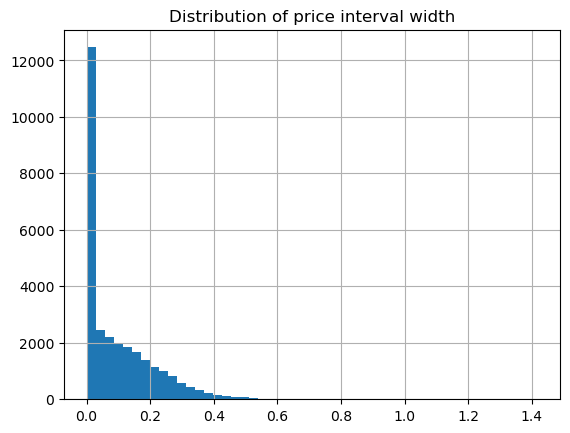

In [12]:
train['price_width'].hist(bins=50)
plt.title('Distribution of price interval width')
plt.show()

Многие значения имеют околонулевой интервал, однако хвост распределения сильно скошен вправо. Однако, не будем удалять это как выброс, возможно эти данные несут ключевую информацию, попробуем замоделировать

In [13]:
train.groupby('activity_flag')['price_width'].mean()

activity_flag
0    0.047992
1    0.134404
Name: price_width, dtype: float64

In [14]:
train.groupby('holiday_flag')['price_width'].mean()

holiday_flag
0    0.097088
1    0.092540
Name: price_width, dtype: float64

In [15]:
train.groupby('n_stores')['price_width'].mean().head()

n_stores
-0.749200    0.009475
-0.749181    0.000426
-0.743389    0.000412
-0.739005    0.082502
-0.733502    0.000454
Name: price_width, dtype: float64

In [16]:
train.groupby('management_group_id')['price_width'].mean().sort_values()

management_group_id
0    0.074749
5    0.079171
1    0.084054
4    0.092005
6    0.099567
3    0.107828
2    0.120721
Name: price_width, dtype: float64

In [17]:
train.groupby('first_category_id')['price_width'].mean().describe()

count    29.000000
mean      0.090871
std       0.033129
min       0.016459
25%       0.070911
50%       0.093078
75%       0.112745
max       0.162627
Name: price_width, dtype: float64

In [18]:
train.groupby('month')[['price_p05', 'price_p95', 'price_width']].mean()

,price_p05,price_p95,price_width
month,,,
3,1.040971,1.131873,0.090903
4,1.025400,1.120062,0.094662
5,1.013952,1.110942,0.096990


In [19]:
train.groupby('dow')['price_width'].mean()

dow
0    0.098297
1    0.095390
2    0.097949
3    0.097170
4    0.092742
5    0.093876
6    0.093114
Name: price_width, dtype: float64

In [20]:
q1 = train['price_width'].quantile(0.01)
q99 = train['price_width'].quantile(0.99)

train[(train['price_width'] < q1) | (train['price_width'] > q99)][
    ['price_p05', 'price_p95', 'price_width']
]

,price_p05,price_p95,price_width
31,1.158685,1.159073,0.000388
140,0.702473,0.702744,0.000271
141,0.741901,0.742184,0.000283
325,2.498629,3.388914,0.890284
360,0.636418,1.126611,0.490194
...,...,...,...
28629,0.619457,1.090964,0.471507
28635,0.690394,1.161979,0.471585
28718,1.214981,1.215373,0.000392
28856,1.189004,1.189396,0.000392


array([[<Axes: title={'center': 'dt'}>,
        <Axes: title={'center': 'price_p05'}>,
        <Axes: title={'center': 'price_p95'}>,
        <Axes: title={'center': 'n_stores'}>],
       [<Axes: title={'center': 'precpt'}>,
        <Axes: title={'center': 'avg_temperature'}>,
        <Axes: title={'center': 'avg_humidity'}>,
        <Axes: title={'center': 'avg_wind_level'}>],
       [<Axes: title={'center': 'holiday_flag'}>,
        <Axes: title={'center': 'activity_flag'}>,
        <Axes: title={'center': 'management_group_id'}>,
        <Axes: title={'center': 'first_category_id'}>],
       [<Axes: title={'center': 'second_category_id'}>,
        <Axes: title={'center': 'third_category_id'}>,
        <Axes: title={'center': 'dow'}>,
        <Axes: title={'center': 'day_of_month'}>],
       [<Axes: title={'center': 'week_of_year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'product_id'}>,
        <Axes: title={'center': 'price_width'}>]], dtype=obje

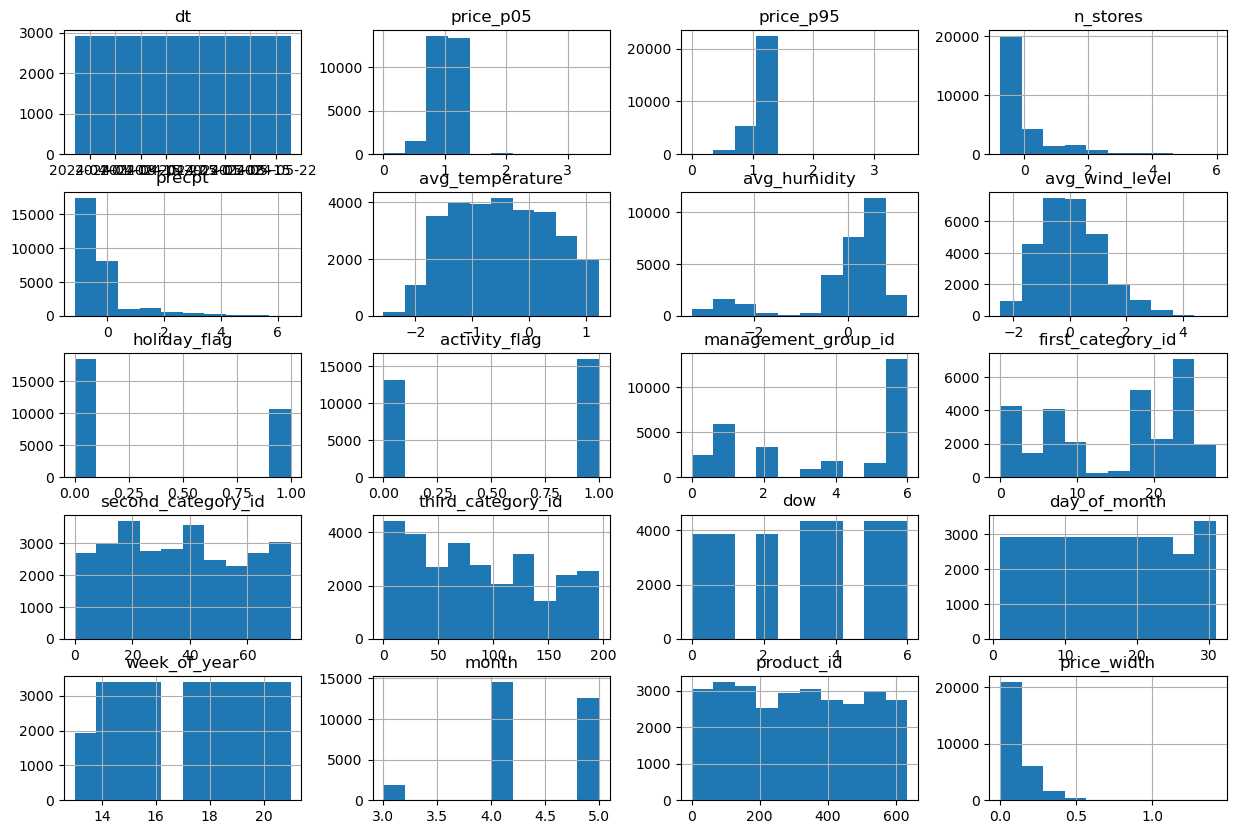

In [21]:
train.hist(figsize=(15,10))

<Axes: >

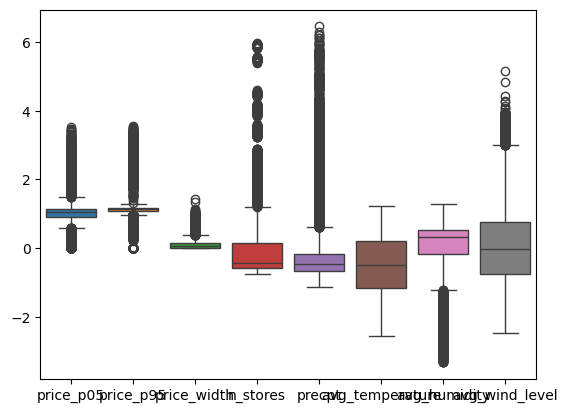

In [22]:
num_cols = [
    'price_p05', 'price_p95', 'price_width',
    'n_stores', 'precpt', 'avg_temperature',
    'avg_humidity', 'avg_wind_level'
]

sns.boxplot(train[num_cols] )

<Axes: >

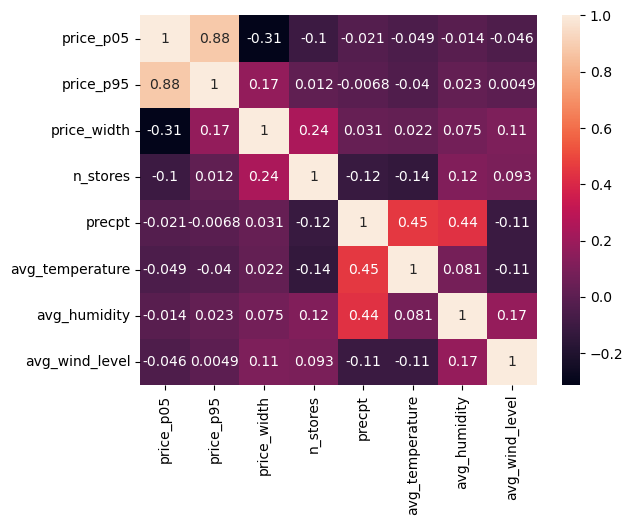

In [23]:
corr = train[num_cols].corr()
sns.heatmap(corr, annot=True)